Final weights: -1.49366474108193 2.432045003293981
Converged in 500 iterations.


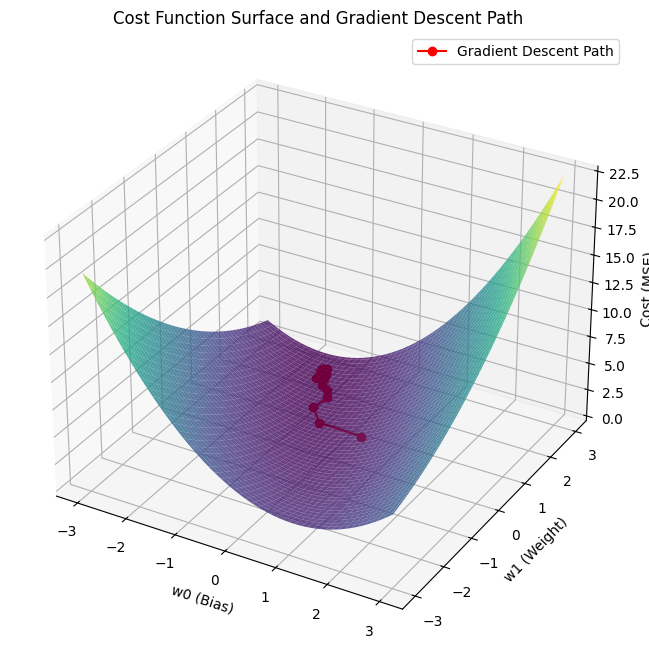

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate synthetic data
def generate_data(n_samples=100):
    np.random.seed(42)  # For reproducibility
    X = np.random.rand(n_samples)  # Single feature
    true_weight = 2.5  # True weight
    true_bias = -1.5  # True bias
    y = true_weight * X + true_bias + np.random.randn(n_samples) * 0.2  # Add noise
    return X, y

# Step 2: Least Mean Squares Algorithm
def least_mean_squares(X, y, learning_rate=0.1, max_iter=500):
    n_samples = len(X)

    # Initialize weights randomly
    w0 = np.random.rand()  # Bias
    w1 = np.random.rand()  # Weight for the feature

    errors = []
    weights_history = []

    for iteration in range(max_iter):
        # Pick a random data point
        idx = np.random.randint(0, n_samples)
        x_i = X[idx]
        y_i = y[idx]

        # Compute prediction and error
        prediction = w0 + w1 * x_i
        error = y_i - prediction

        # Update weights using LMS
        w0 += 2 * learning_rate * error
        w1 += 2 * learning_rate * error * x_i

        # Track error and weights
        errors.append(error**2)
        weights_history.append((w0, w1))

        # Check for convergence (small error threshold)
        if abs(error) < 1e-6:
            break

    return w0, w1, errors, weights_history

# Step 3: Plot cost function (3D bowl-shaped graph)
def plot_cost_function_3d(X, y, weights_history):
    # Generate a grid of w0 and w1 values
    w0_vals = np.linspace(-3, 3, 100)
    w1_vals = np.linspace(-3, 3, 100)
    W0, W1 = np.meshgrid(w0_vals, w1_vals)

    # Compute the cost function (Mean Squared Error) for each pair of (w0, w1)
    Z = np.zeros_like(W0)
    for i in range(W0.shape[0]):
        for j in range(W0.shape[1]):
            predictions = W0[i, j] + W1[i, j] * X
            Z[i, j] = np.mean((y - predictions)**2)

    # 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W0, W1, Z, cmap='viridis', alpha=0.8)

    # Plot weights history (downsampled for clarity)
    weights_history = np.array(weights_history)
    sampled_indices = np.linspace(0, len(weights_history) - 1, 20, dtype=int)
    sampled_weights = weights_history[sampled_indices]
    ax.plot(sampled_weights[:, 0], sampled_weights[:, 1],
            [np.mean((y - (w0 + w1 * X))**2) for w0, w1 in sampled_weights],
            color='r', marker='o', label='Gradient Descent Path')

    ax.set_xlabel('w0 (Bias)')
    ax.set_ylabel('w1 (Weight)')
    ax.set_zlabel('Cost (MSE)')
    ax.set_title('Cost Function Surface and Gradient Descent Path')
    ax.legend()
    plt.show()

# Main
X, y = generate_data()
w0, w1, errors, weights_history = least_mean_squares(X, y)

print("Final weights:", w0, w1)
print("Converged in", len(errors), "iterations.")

plot_cost_function_3d(X, y, weights_history)